In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("phones-v1.csv")

<Axes: xlabel='Price Range'>

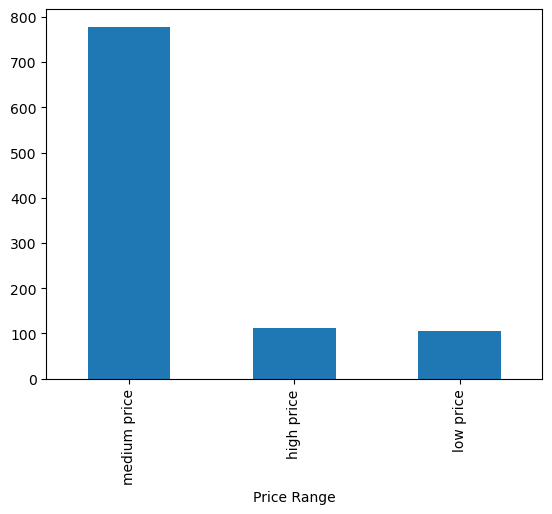

In [3]:
df["Price Range"].value_counts().plot.bar()

In [4]:
df["Brand"].unique()

array(['Apple', 'Samsung', 'Xiaomi'], dtype=object)

In [5]:
df = pd.concat([df, pd.get_dummies(df["Brand"])], axis=1)
df = df.drop(columns=["Brand"])

In [6]:
df["Model"].unique()

array(['Apple iPhone X', 'Samsung Galaxy S9+', 'Samsung Galaxy S9', nan,
       'Apple iPhone XS Max', 'Apple iPhone XS', 'Apple iPhone XR',
       'Samsung Galaxy S10e', 'Samsung Galaxy S10+', 'Samsung Galaxy S10',
       'Samsung Galaxy Note10+', 'Apple iPhone 11', 'Apple iPhone 11 Pro',
       'Apple iPhone 11 Pro Max', 'Samsung Galaxy A51',
       'Samsung Galaxy A71', 'Xiaomi Mi 10 5G', 'Samsung Galaxy S20 5G',
       'Samsung Galaxy S20 Ultra 5G', 'Samsung Galaxy S20+ 5G',
       'Apple iPhone SE (2020)', 'Samsung Galaxy A31',
       'Samsung Galaxy A51 5G', 'Xiaomi Redmi Note 9S',
       'Samsung Galaxy M11', 'Xiaomi Redmi Note 9 Pro',
       'Xiaomi Mi Note 10 Lite', 'Xiaomi Redmi Note 9',
       'Xiaomi Poco F2 Pro', 'Xiaomi Redmi 9', 'Samsung Galaxy A71 5G',
       'Xiaomi Redmi 9A', 'Xiaomi Redmi 9C', 'Samsung Galaxy Note20 5G',
       'Samsung Galaxy Note20 Ultra 5G', 'Xiaomi Poco X3 NFC',
       'Samsung Galaxy S20 FE 5G', 'Xiaomi Mi 10T Pro 5G',
       'Apple iPhone 12', 

In [7]:
df = df.drop(columns=["Model"])

In [8]:
df.head()

,Storage (GB),RAM (GB),Launch,Dimensions,Weight (g),Display Type,Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,Apple,Samsung,Xiaomi
0,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price,True,False,False
1,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price,True,False,False
2,64,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,low price,False,True,False
3,128,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price,False,True,False
4,256,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,high price,False,True,False


In [9]:
df["Launch"].unique().shape

(148,)

In [10]:
df = df.drop(columns=["Launch"])

In [11]:
def preprocess_dimensions(value):
    if not pd.isna(value):
        values = value.split(" mm")[0].split(" x ")
        return [float(value) for value in values]
    return value

In [12]:
df[["Height", "Width", "Thickness"]] = df["Dimensions"].apply(preprocess_dimensions).tolist()

In [13]:
df = df.drop(columns=["Dimensions"])

In [14]:
df.head()

,Storage (GB),RAM (GB),Weight (g),Display Type,Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,Apple,Samsung,Xiaomi,Height,Width,Thickness
0,256,3,174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price,True,False,False,143.6,70.9,7.7
1,256,3,174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price,True,False,False,143.6,70.9,7.7
2,64,6,189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,low price,False,True,False,158.1,73.8,8.5
3,128,6,189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price,False,True,False,158.1,73.8,8.5
4,256,6,189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,high price,False,True,False,158.1,73.8,8.5


In [15]:
df["Display Type"].unique()

array(['OLED', 'AMOLED', 'LCD'], dtype=object)

In [16]:
df = pd.concat([df, pd.get_dummies(df["Display Type"])], axis=1)
df = df.drop(columns=["Display Type"])

In [17]:
df.head()

,Storage (GB),RAM (GB),Weight (g),Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,Apple,Samsung,Xiaomi,Height,Width,Thickness,AMOLED,LCD,OLED
0,256,3,174.0,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price,True,False,False,143.6,70.9,7.7,False,False,True
1,256,3,174.0,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price,True,False,False,143.6,70.9,7.7,False,False,True
2,64,6,189.0,6.2,Android,True,3500.0,Octa-Core,2018,529,low price,False,True,False,158.1,73.8,8.5,True,False,False
3,128,6,189.0,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price,False,True,False,158.1,73.8,8.5,True,False,False
4,256,6,189.0,6.2,Android,True,3500.0,Octa-Core,2018,529,high price,False,True,False,158.1,73.8,8.5,True,False,False


In [18]:
df["OS"].unique()

array(['iOS', 'Android'], dtype=object)

In [19]:
df = pd.concat([df, pd.get_dummies(df["OS"])], axis=1)

In [20]:
df = df.drop(columns=["OS"])

In [21]:
df["NFC"] = df["NFC"].astype(int)

In [22]:
df["CPU"] = df["CPU"].map({"Quad-Core": 4, "Hexa-Core": 6, "Octa-Core": 8})

In [23]:
ordinal_encoder = OrdinalEncoder(
    categories=[["low price", "medium price", "high price"]],
    handle_unknown="use_encoded_value",
    unknown_value=np.nan,
)

In [25]:
df[["Price Range"]] = ordinal_encoder.fit_transform(df[["Price Range"]])

In [26]:
df.head()

,Storage (GB),RAM (GB),Weight (g),Display Size,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,...,Samsung,Xiaomi,Height,Width,Thickness,AMOLED,LCD,OLED,Android,iOS
0,256,3,174.0,5.8,1,2716.0,6,2017,458,2.0,...,False,False,143.6,70.9,7.7,False,False,True,False,True
1,256,3,174.0,5.8,1,2716.0,6,2017,458,0.0,...,False,False,143.6,70.9,7.7,False,False,True,False,True
2,64,6,189.0,6.2,1,3500.0,8,2018,529,0.0,...,True,False,158.1,73.8,8.5,True,False,False,True,False
3,128,6,189.0,6.2,1,3500.0,8,2018,529,1.0,...,True,False,158.1,73.8,8.5,True,False,False,True,False
4,256,6,189.0,6.2,1,3500.0,8,2018,529,2.0,...,True,False,158.1,73.8,8.5,True,False,False,True,False


In [27]:
cols = ["Battery (mAh)", "Display Size", "CPU", "Apple", "Height", "Thickness", "OLED", "Android", "iOS"]

In [28]:
iterative_imputer = IterativeImputer()

In [29]:
df[cols] = iterative_imputer.fit_transform(df[cols])

In [30]:
df.isnull().sum()

Storage (GB)      0
RAM (GB)          0
Weight (g)        0
Display Size      0
NFC               0
Battery (mAh)     0
CPU               0
Year              0
PPI Density       0
Price Range      15
Apple             0
Samsung           0
Xiaomi            0
Height            0
Width             0
Thickness         0
AMOLED            0
LCD               0
OLED              0
Android           0
iOS               0
dtype: int64

In [31]:
df.dropna(subset=["Price Range"], axis=0, inplace=True)

In [32]:
df.isnull().sum()

Storage (GB)     0
RAM (GB)         0
Weight (g)       0
Display Size     0
NFC              0
Battery (mAh)    0
CPU              0
Year             0
PPI Density      0
Price Range      0
Apple            0
Samsung          0
Xiaomi           0
Height           0
Width            0
Thickness        0
AMOLED           0
LCD              0
OLED             0
Android          0
iOS              0
dtype: int64

In [33]:
X, y = df.drop(columns=["Price Range"]), df["Price Range"]

In [34]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [35]:
scaler = MinMaxScaler()

In [36]:
train_X = scaler.fit_transform(train_X)

In [37]:
test_X = scaler.transform(test_X)

In [38]:
classifier = LogisticRegression().fit(train_X, train_y)

In [39]:
pred_y = classifier.predict(test_X)

In [40]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.60      0.16      0.25        19
         1.0       0.82      0.95      0.88       159
         2.0       0.40      0.18      0.25        22

    accuracy                           0.79       200
   macro avg       0.61      0.43      0.46       200
weighted avg       0.75      0.79      0.75       200



In [41]:
classifier = DecisionTreeClassifier().fit(train_X, train_y)

In [42]:
pred_y = classifier.predict(test_X)

In [43]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.43      0.47      0.45        19
         1.0       0.86      0.84      0.85       159
         2.0       0.39      0.41      0.40        22

    accuracy                           0.76       200
   macro avg       0.56      0.58      0.57       200
weighted avg       0.77      0.76      0.76       200



In [44]:
param_grid = {
    "criterion": ["entropy", "gini"],
    "max_depth": [None, 1, 2, 3, 4],
}

In [45]:
classifier = DecisionTreeClassifier()

In [48]:
grid_search = GridSearchCV(
    classifier,
    param_grid,
    scoring="f1_weighted",
    cv=5,
)

In [50]:
grid_search.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 1, 2, 3, 4]},
             scoring='f1_weighted')

In [51]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [52]:
pred_y = grid_search.predict(test_X)

In [53]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.45      0.26      0.33        19
         1.0       0.84      0.92      0.88       159
         2.0       0.56      0.41      0.47        22

    accuracy                           0.80       200
   macro avg       0.62      0.53      0.56       200
weighted avg       0.78      0.80      0.78       200

